# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [1]:
# IMPORT POTREBNIH BIBLIOTEKA
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Reshape

In [2]:
if tf.test.gpu_device_name():
    print('GPU je prepoznat:', tf.test.gpu_device_name())
else:
    print('GPU nije prepoznat.')

GPU je prepoznat: /device:GPU:0


In [3]:
#1. Definiranje putanje do glavnog direktorija
base_dir = r'C:\Users\Pc\Ana projekt\dataset'
train_dir = os.path.join(base_dir,'training')
val_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Class names
class_names = ["Kocka", "Kugla", "Piramida", "Stozac", "Valjak"]

In [4]:
# ImageDataGenerator instances
train_datagen = ImageDataGenerator(
    rescale=1./255,
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

# Data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)


Found 2000 images belonging to 5 classes.
Found 500 images belonging to 5 classes.
Found 0 images belonging to 0 classes.


Training set:


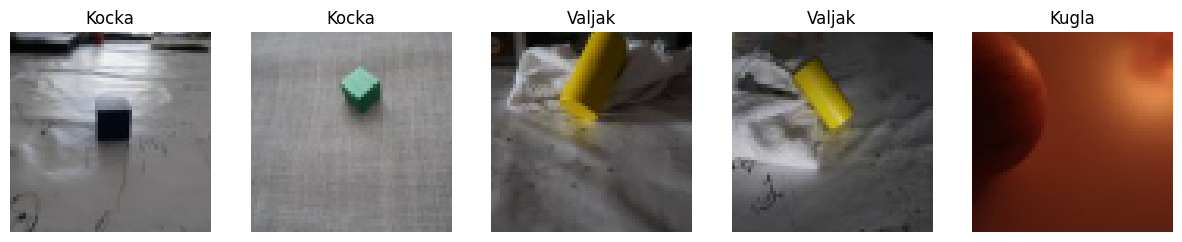

Validation set:


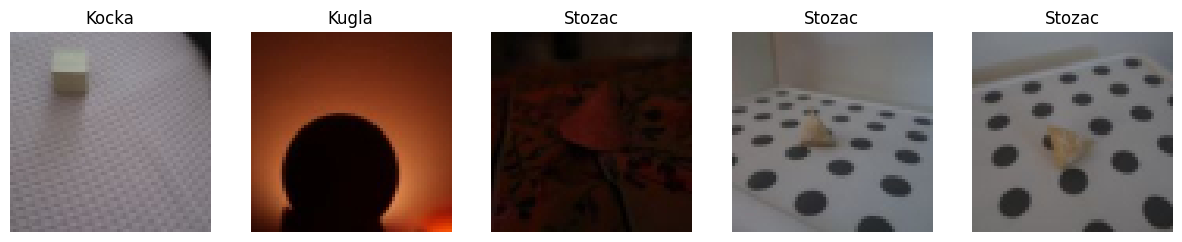

In [5]:
# Function to display images
def show_images(generator, class_names, num_images=5):
    images, labels = next(generator)
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
    for i in range(num_images):
        axes[i].imshow(images[i])
        axes[i].set_title(class_names[np.argmax(labels[i])])
        axes[i].axis('off')
    plt.show()


# Display a few images from the training set
print("Training set:")
show_images(train_generator, class_names, num_images=5)

# Display a few images from the validation set
print("Validation set:")
show_images(val_generator, class_names, num_images=5)

# Display a few images from the test set
# print("Test set:")
# show_images(test_generator, class_names, num_images=5)

# GRAFOVI
def plot_model_accuracy(history):
  loss_train = history.history['accuracy']
  loss_val = history.history['val_accuracy']
  epochs = range(1, len(loss_train)+1)
  plt.plot(epochs, loss_train, 'g', label='Training accuracy')
  plt.plot(epochs, loss_val, 'b', label='validation accuracy')
  plt.title('Training and Validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

def plot_model_loss(history):
  loss_train = history.history['loss']
  loss_val = history.history['val_loss']
  epochs = range(1, len(loss_train)+1)
  plt.plot(epochs, loss_train, 'g', label='Training loss')
  plt.plot(epochs, loss_val, 'b', label='validation loss')
  plt.title('Training and Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [6]:
# Definiranje modela
model1 = Sequential()

# Konvolucijski sloj
model1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)))
model1.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten sloj za izravnjavanje rezultata iz konvolucionih slojeva
model1.add(Flatten())

# Fully connected sloj
model1.add(Dense(32, activation='relu'))

# Izlazni sloj
model1.add(Dense(5, activation='softmax'))

# Kompilacija modela
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Prikaz modela
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 32)                984096    
                                                                 
 dense_1 (Dense)             (None, 5)                 165       
                                                                 
Total params: 985,157
Trainable params: 985,157
Non-trainable params: 0
__________________________________________________

In [7]:
history = model1.fit(train_generator, validation_data=val_generator, epochs=200, verbose=2)

Epoch 1/200
63/63 - 5s - loss: 1.6650 - accuracy: 0.3005 - val_loss: 1.4480 - val_accuracy: 0.3720 - 5s/epoch - 77ms/step
Epoch 2/200
63/63 - 1s - loss: 1.4023 - accuracy: 0.4165 - val_loss: 1.3861 - val_accuracy: 0.3960 - 660ms/epoch - 10ms/step
Epoch 3/200
63/63 - 1s - loss: 1.3072 - accuracy: 0.4630 - val_loss: 1.3104 - val_accuracy: 0.4260 - 678ms/epoch - 11ms/step
Epoch 4/200
63/63 - 1s - loss: 1.2121 - accuracy: 0.5125 - val_loss: 1.2623 - val_accuracy: 0.4700 - 658ms/epoch - 10ms/step
Epoch 5/200
63/63 - 1s - loss: 1.1249 - accuracy: 0.5650 - val_loss: 1.3257 - val_accuracy: 0.4440 - 660ms/epoch - 10ms/step
Epoch 6/200
63/63 - 1s - loss: 1.0598 - accuracy: 0.5870 - val_loss: 1.2249 - val_accuracy: 0.4920 - 676ms/epoch - 11ms/step
Epoch 7/200
63/63 - 1s - loss: 0.9803 - accuracy: 0.6205 - val_loss: 1.2154 - val_accuracy: 0.4720 - 711ms/epoch - 11ms/step
Epoch 8/200
63/63 - 1s - loss: 0.8995 - accuracy: 0.6530 - val_loss: 1.2357 - val_accuracy: 0.4720 - 633ms/epoch - 10ms/step
Epo

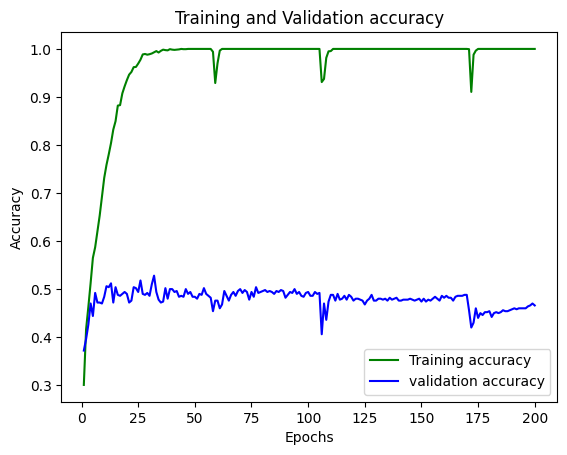

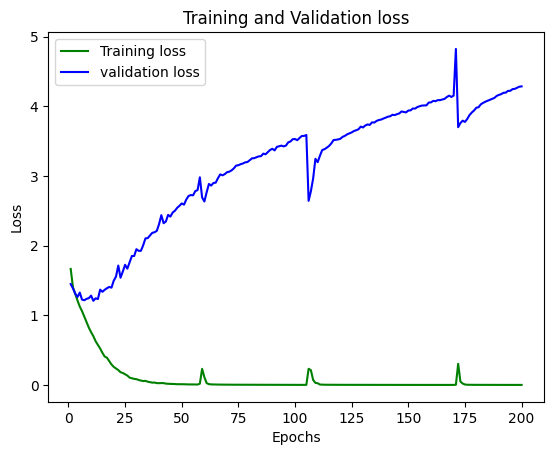

In [8]:
plot_model_accuracy(history)
plot_model_loss(history)